In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
DDoS=pd.read_csv('/content/metasploitable-2.csv')

In [3]:
DDoS.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [4]:
DDoS['Label'].value_counts()

DDoS     73529
Probe    61757
DoS       1145
BFA        295
U2R         17
Name: Label, dtype: int64

<Figure size 432x288 with 0 Axes>

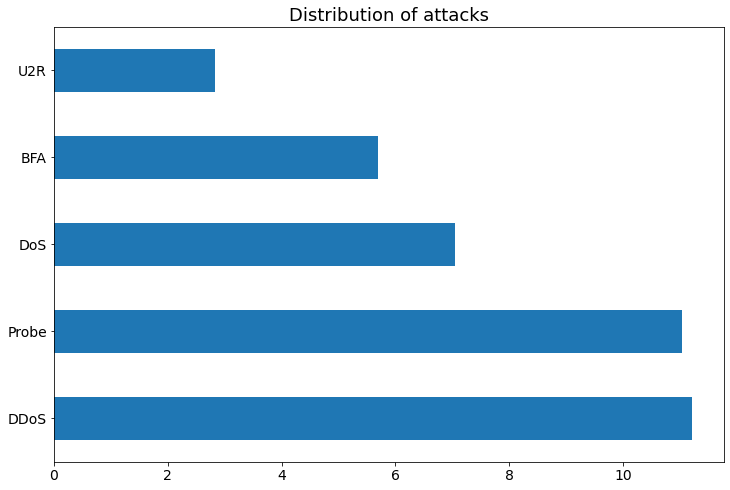

In [5]:
#log scaled distribution of attacks
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
DDoS['Label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [6]:
#Transformations of categorical features
DDoS['Flow ID'] = DDoS['Flow ID'].astype('category')
DDoS['Src IP'] = DDoS['Src IP'].astype('category')
DDoS['Dst IP'] = DDoS['Dst IP'].astype('category')
DDoS['Timestamp'] = DDoS['Timestamp'].astype('category')
DDoS['Label'] = DDoS['Label'].astype('category')

cat_columns = DDoS.select_dtypes(['category']).columns
DDoS[cat_columns] = DDoS[cat_columns].apply(lambda x: x.cat.codes)

In [7]:
#Removal of duplicates
DDoS.drop_duplicates(subset=None, keep='first', inplace=True)

In [8]:
DDoS.shape

(136743, 84)

In [9]:
DDoS['Label'].value_counts()

1    73529
3    61757
2     1145
0      295
4       17
Name: Label, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X = DDoS[['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]
y = DDoS['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
DDoS.groupby(["Timestamp","Src IP"]).first()

Flow ID  Src Port  Dst IP  Dst Port  Protocol  \
Timestamp Src IP                                                  
0         34877     44484     48052       2      4444         6   
          37596     46761     46191       1      6667         6   
1         34877     44484     48052       2      4444         6   
          37596     46761     46191       1      6667         6   
2         34877     61449      8180       2     36317         6   
...                   ...       ...     ...       ...       ...   
54        37596     61037     57880       1        80         6   
55        37596     61041     57888       1        80         6   
56        34877     61148        80       2     58102         6   
          37596     61115     58036       1        80         6   
57        37596     46192     38811       1      6200         6   

                  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Timestamp Src IP                                                               
0         34877         8737298             3             4               24   
          37596        11685939             6             6               30   
1         34877         8734991             3             4               24   
          37596        11684506             6             6              236   
2         34877            4880             0             2                0   
...                         ...           ...           ...              ...   
54        37596       109089313            11            12              211   
55        37596        56528561             5             5               52   
56        34877           66031             0             3                0   
          37596           15815             1             1                0   
57        37596         3625973             6             7               48   

                  TotLen Bwd Pkts  ...  Fwd Seg Size Min   Active Mean  \
Timestamp Src IP                   ...                                   
0         34877                 3  ...                 0  3.266000e+03   
          37596                90  ...                 0  1.007116e+06   
1         34877                 3  ...                 0  2.816000e+03   
          37596               236  ...                 0  1.010213e+06   
2         34877                 0  ...                 0  0.000000e+00   
...                           ...  ...               ...           ...   
54        37596                 0  ...                 0  5.578216e+05   
55        37596                22  ...                 0  8.500000e+00   
56        34877                 0  ...                 0  0.000000e+00   
          37596                 0  ...                 0  0.000000e+00   
57        37596                41  ...                 0  0.000000e+00   

                    Active Std  Active Max  Active Min   Idle Mean  \
Timestamp Src IP                                                     
0         34877   0.000000e+00        3266        3266   8730838.0   
          37596   0.000000e+00     1007116     1007116   9992141.0   
1         34877   0.000000e+00        2816        2816   8728974.0   
          37596   0.000000e+00     1010213     1010213   9992159.0   
2         34877   0.000000e+00           0           0         0.0   
...                        ...         ...         ...         ...   
54        37596   1.475776e+06     3904568          18  15000000.0   
55        37596   1.290994e+00          10           7  14100000.0   
56        34877   0.000000e+00           0           0         0.0   
          37596   0.000000e+00           0           0         0.0   
57        37596   0.000000e+00           0           0         0.0   

                      Idle Std    Idle Max    Idle Min  Label  
Timestamp Src IP                                               
0         34877   0.000000e+00   8730838.0   8730838.0      4  
          37596   0.000000e+00   999214

In [13]:
# reshape inputs for LSTM [samples, timesteps, features]


X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (109394, 1, 83)
Test data shape: (27349, 1, 83)


In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.utils import plot_model

In [20]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(83, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(64, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation = 'softmax', kernel_regularizer='l2'))
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [21]:
model = create_baseline()

In [22]:
history = model.fit(X_train, y_train, epochs = 10,validation_split=0.2,verbose = 1)

Epoch 1/10
2735/2735 [==============================] - 18s 5ms/step - loss: 0.2541 - accuracy: 0.9888 - val_loss: 0.1211 - val_accuracy: 0.9937
Epoch 2/10
2735/2735 [==============================] - 12s 5ms/step - loss: 0.1178 - accuracy: 0.9936 - val_loss: 0.1065 - val_accuracy: 0.9930
Epoch 3/10
2735/2735 [==============================] - 13s 5ms/step - loss: 0.1092 - accuracy: 0.9939 - val_loss: 0.0991 - val_accuracy: 0.9961
Epoch 4/10
2735/2735 [==============================] - 13s 5ms/step - loss: 0.1052 - accuracy: 0.9943 - val_loss: 0.0965 - val_accuracy: 0.9957
Epoch 5/10
2735/2735 [==============================] - 13s 5ms/step - loss: 0.1036 - accuracy: 0.9949 - val_loss: 0.0964 - val_accuracy: 0.9961
Epoch 6/10
2735/2735 [==============================] - 13s 5ms/step - loss: 0.1030 - accuracy: 0.9949 - val_loss: 0.0964 - val_accuracy: 0.9965
Epoch 7/10
2735/2735 [==============================] - 13s 5ms/step - loss: 0.1028 - accuracy: 0.9948 - val_loss: 0.0960 - val_ac

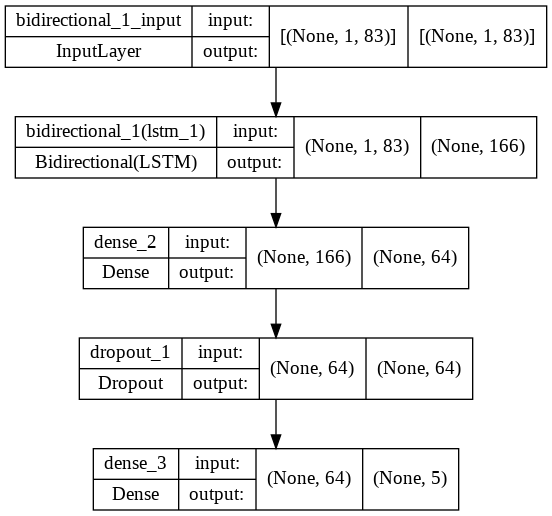

In [23]:
from tensorflow import keras
keras.utils.plot_model(model,show_shapes=True)

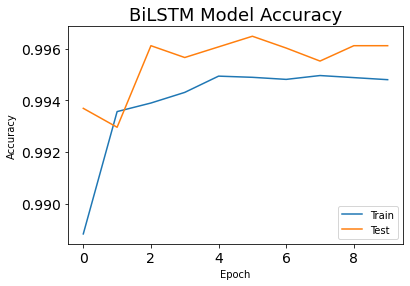

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BiLSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BiLSTM INSDN Model Accuracy.png')
plt.show()

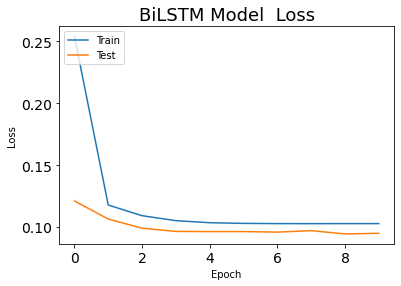

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BiLSTM Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BiLSTM INSDN Model Loss.png')
plt.show()

In [26]:
predict = model.predict(X_test, verbose=1)

855/855 [==============================] - 2s 2ms/step


In [27]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.62%
